In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [15]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [17]:
num_col = df.select_dtypes(include='number')
num_col

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


<Axes: >

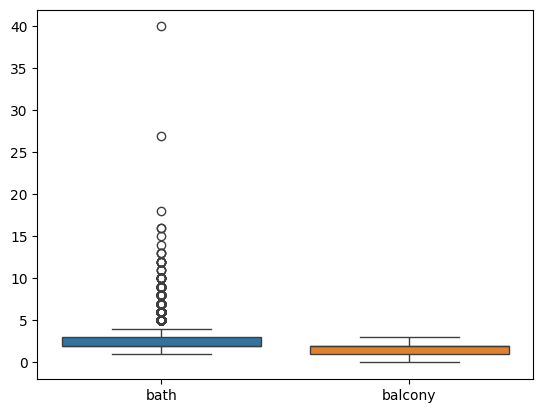

In [18]:
sns.boxplot(num_col.iloc[:, :2])

# Scaling = making all numeric features come to a similar range

In [19]:
def zscore(col_name):
    return (num_col[col_name] - num_col[col_name].mean())/num_col[col_name].std()

bath_scaled = zscore('bath')
removed_outliers = bath_scaled[abs(bath_scaled)<=1.5]

In [20]:
bath_scaled.mean() # near to 0

-1.491136714284803e-16

In [21]:
bath_scaled.std() # near to 1

0.9999999999999999

In [22]:
bath_scaled[bath_scaled>10]

1718     18.120127
4684     27.811074
11559    11.411009
Name: bath, dtype: float64

<Axes: ylabel='bath'>

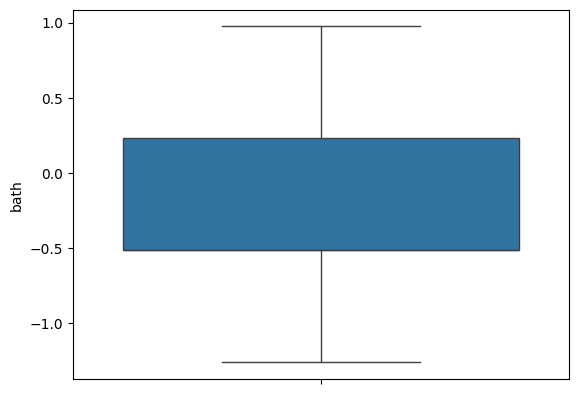

In [23]:
sns.boxplot(removed_outliers)